# Machine Learning Data Processing

In [91]:
# ! pip install keras_tuner
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
import datetime

In [93]:
f = './Resources/horse_databases.csv'
new_df = pd.read_csv(f)
new_df.head(2)

,race_ID,Date,course,race_name,Distance_covered,Track_condition,season,race_group,race_type,Race_Money,...,age,Weight,Gear,Top_speed,sire,dam,damsire,comment,Winner,prize_money
0,RID1169-IE-05,2005-06-02,other,Sheilas Cottage (Mares) Maiden Hurdle,3200,other,5,Hurdle,Handicap,11568.0,...,5,157,t,93.0,Desert Style (IRE),Lough N Uisce (IRE),Boyne Valley,Held up - progress into mid-division halfway -...,0,852.0
1,RID1169-IE-05,2005-06-02,other,Sheilas Cottage (Mares) Maiden Hurdle,3200,other,5,Hurdle,Handicap,11568.0,...,4,150,t,79.0,Bob Back (USA),Guest Cailin (IRE),Be My Guest,Mid-division 8th approaching 3 out - 6th after...,0,0.0


In [ ]:
# Drop features or data that will not contribute most to the prediction variable


In [72]:
new_df.shape

(140461, 18)

In [74]:
new_df['Date']= pd.to_datetime(new_df['Date'])
new_df.head(2)

,Date,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,Winner,prize_money
0,2005-06-02,other,other,3200,other,5,Hurdle,Handicap,11568.0,other,other,3.0,5,157,t,93.0,0,852.0
1,2005-06-02,other,other,3200,other,5,Hurdle,Handicap,11568.0,other,other,5.0,4,150,t,79.0,0,0.0


In [75]:
new_df.dtypes

Date               datetime64[ns]
course                     object
band                       object
Distance                    int64
Track_condition            object
season                      int64
race_group                 object
race_type                  object
Race_Money                float64
trainer                    object
jockey                     object
Track_position            float64
age                         int64
Weight                      int64
gear                       object
Top_speed                 float64
Winner                      int64
prize_money               float64
dtype: object

In [76]:
new_df.set_index('Date').head(2)

,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,Winner,prize_money
Date,,,,,,,,,,,,,,,,,
2005-06-02,other,other,3200,other,5,Hurdle,Handicap,11568.0,other,other,3.0,5,157,t,93.0,0,852.0
2005-06-02,other,other,3200,other,5,Hurdle,Handicap,11568.0,other,other,5.0,4,150,t,79.0,0,0.0


In [77]:
model_df = new_df.iloc[0:120000, :]
model_df.head(2)

,Date,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,Winner,prize_money
0,2005-06-02,other,other,3200,other,5,Hurdle,Handicap,11568.0,other,other,3.0,5,157,t,93.0,0,852.0
1,2005-06-02,other,other,3200,other,5,Hurdle,Handicap,11568.0,other,other,5.0,4,150,t,79.0,0,0.0


In [78]:
cleaned_df = model_df.drop(['Date'], axis=1)

cleaned_df.head(2)

,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,Winner,prize_money
0,other,other,3200,other,5,Hurdle,Handicap,11568.0,other,other,3.0,5,157,t,93.0,0,852.0
1,other,other,3200,other,5,Hurdle,Handicap,11568.0,other,other,5.0,4,150,t,79.0,0,0.0


In [79]:
cleaned_positive = cleaned_df[cleaned_df['Winner']==1]
cleaned_positive.head(2)

,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,Winner,prize_money
3,other,other,3200,other,5,Hurdle,Handicap,12532.0,other,other,1.0,4,161,t,33.0,1,8983.0
11,other,4yo+,4000,Soft,5,Hurdle,Handicap,14460.0,other,other,1.0,4,156,b,83.0,1,10365.0


In [80]:
cleaned_neg = cleaned_df[cleaned_df['Winner']==0].sample(n=len(cleaned_positive))
cleaned_neg.head(2)

,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,Winner,prize_money
49374,other,4yo+,4700,Soft,6,Hurdle,Handicap,9512.272727,other,Tom Scudamore,9.0,8,146,other,58.0,0,0.0
100727,other,other,4000,Good,14,Hurdle,Handicap,6707.045455,other,other,6.0,4,156,tp,88.0,0,0.0


In [81]:
clean_df = pd.concat([cleaned_positive,cleaned_neg], axis=0)
clean_df.head(2)

,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,Winner,prize_money
3,other,other,3200,other,5,Hurdle,Handicap,12532.0,other,other,1.0,4,161,t,33.0,1,8983.0
11,other,4yo+,4000,Soft,5,Hurdle,Handicap,14460.0,other,other,1.0,4,156,b,83.0,1,10365.0


In [19]:
clean_df.to_csv('database_data.csv', index=False)

In [20]:
clean_df.shape

(31280, 17)

In [21]:
# Assign X as dataframe of the features and y as a series of the outcome variable
X = clean_df.drop("Winner", 1) 
y = clean_df.Winner # target

In [22]:
X.shape

(31280, 16)

In [23]:
y.head(2)

3     1
11    1
Name: Winner, dtype: int64

In [24]:
X.shape

(31280, 16)

In [25]:
y.shape

(31280,)

In [26]:
X.head(2)

,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,prize_money
3,other,other,3200,other,5,Hurdle,Handicap,12532.0,other,other,1.0,4,161,t,33.0,8983.0
11,other,4yo+,4000,Soft,5,Hurdle,Handicap,14460.0,other,other,1.0,4,156,b,83.0,10365.0


In [27]:
len(X.columns)

16

In [28]:
X_= X.drop(['band','season'],axis=1)

In [66]:
X_.head(2)

,course,Distance,Track_condition,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,prize_money
3,other,3200,other,Hurdle,Handicap,12532.0,other,other,1.0,4,161,t,33.0,8983.0
11,other,4000,Soft,Hurdle,Handicap,14460.0,other,other,1.0,4,156,b,83.0,10365.0


In [ ]:
X_df = X.drop(['race_ID', 'class','time','dist.f.','Month', 'Year', 'Period', 'Runners','fin_time', 'dec','weight','dec_clean','sire', 'dam', 'damsire', 'comment','race_name','btn','sp','or','rpr','horse_name','exp_chance','prob'],axis=1)
X_df.head(2)

In [68]:
X_.dtypes

course              object
Distance             int64
Track_condition     object
race_group          object
race_type           object
Race_Money         float64
trainer             object
jockey              object
Track_position     float64
age                  int64
Weight               int64
gear                object
Top_speed          float64
prize_money        float64
dtype: object

In [30]:
# Print object variable column
# Print object variable column
for col_name in X_.columns:
    if X_[col_name].dtypes == 'object':
        unique_cat = len(X_[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'course' has 5 unique categories
Feature 'Track_condition' has 4 unique categories
Feature 'race_group' has 4 unique categories
Feature 'race_type' has 2 unique categories
Feature 'trainer' has 3 unique categories
Feature 'jockey' has 3 unique categories
Feature 'gear' has 5 unique categories


In [31]:
# assign labels denoted by y to our train and test data sets
y_label = LabelEncoder().fit_transform(clean_df["Winner"])
y_label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

<AxesSubplot:>

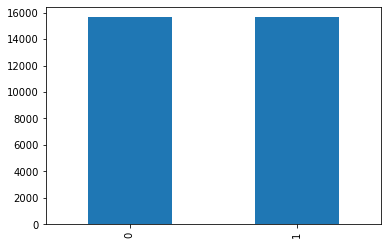

In [32]:
clean_df["Winner"].value_counts().plot(kind="bar")

In [33]:
# get_dummies for train data
X_dum = pd.get_dummies((X_), drop_first=True)
X_dum.head(2)

,Distance,Race_Money,Track_position,age,Weight,Top_speed,prize_money,course_Fontwell,course_Uttoxeter,course_Worcester,...,race_group_Unknown,race_type_Handicap,trainer_Gordon Elliott,trainer_other,jockey_Tom Scudamore,jockey_other,gear_other,gear_p,gear_t,gear_tp
3,3200,12532.0,1.0,4,161,33.0,8983.0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
11,4000,14460.0,1.0,4,156,83.0,10365.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [34]:
X_dum.columns

Index(['Distance', 'Race_Money', 'Track_position', 'age', 'Weight',
       'Top_speed', 'prize_money', 'course_Fontwell', 'course_Uttoxeter',
       'course_Worcester', 'course_other', 'Track_condition_Good To Soft',
       'Track_condition_Soft', 'Track_condition_other', 'race_group_Chase',
       'race_group_Hurdle', 'race_group_Unknown', 'race_type_Handicap',
       'trainer_Gordon Elliott', 'trainer_other', 'jockey_Tom Scudamore',
       'jockey_other', 'gear_other', 'gear_p', 'gear_t', 'gear_tp'],
      dtype='object')

In [35]:
X_dum.nunique()

Distance                          43
Race_Money                      2022
Track_position                    26
age                               14
Weight                            49
Top_speed                        172
prize_money                     3547
course_Fontwell                    2
course_Uttoxeter                   2
course_Worcester                   2
course_other                       2
Track_condition_Good To Soft       2
Track_condition_Soft               2
Track_condition_other              2
race_group_Chase                   2
race_group_Hurdle                  2
race_group_Unknown                 2
race_type_Handicap                 2
trainer_Gordon Elliott             2
trainer_other                      2
jockey_Tom Scudamore               2
jockey_other                       2
gear_other                         2
gear_p                             2
gear_t                             2
gear_tp                            2
dtype: int64

# Machine Learning Model

In [36]:
X_dum.head(2)

,Distance,Race_Money,Track_position,age,Weight,Top_speed,prize_money,course_Fontwell,course_Uttoxeter,course_Worcester,...,race_group_Unknown,race_type_Handicap,trainer_Gordon Elliott,trainer_other,jockey_Tom Scudamore,jockey_other,gear_other,gear_p,gear_t,gear_tp
3,3200,12532.0,1.0,4,161,33.0,8983.0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
11,4000,14460.0,1.0,4,156,83.0,10365.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [37]:
from collections import Counter
counter = Counter(y)
for k, v in counter.items():
  dist = v/ len(y)*100
  print(f"Class={k}, n={v} ({dist}%)")

Class=1, n=15640 (50.0%)
Class=0, n=15640 (50.0%)


<BarContainer object of 2 artists>

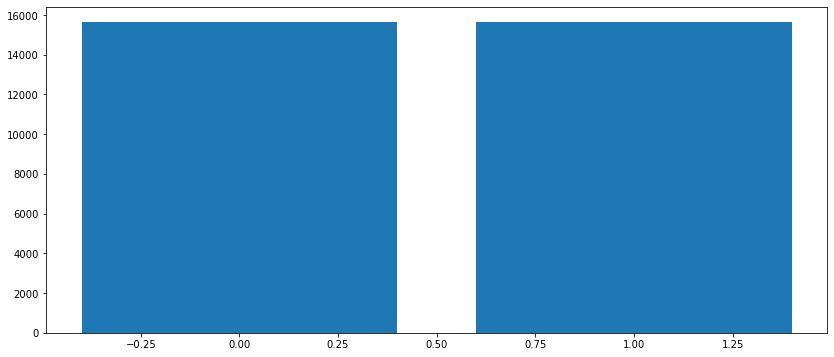

In [38]:
plt.figure(1, figsize=(14,6))
plt.bar(counter.keys(),counter.values())

In [39]:
y_label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [40]:
X_dum.head(20)

,Distance,Race_Money,Track_position,age,Weight,Top_speed,prize_money,course_Fontwell,course_Uttoxeter,course_Worcester,...,race_group_Unknown,race_type_Handicap,trainer_Gordon Elliott,trainer_other,jockey_Tom Scudamore,jockey_other,gear_other,gear_p,gear_t,gear_tp
3,3200,12532.0,1.0,4,161,33.0,8983.0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
11,4000,14460.0,1.0,4,156,83.0,10365.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
19,3200,12050.0,1.0,8,150,45.0,8637.5,0,0,0,...,0,1,0,1,0,1,0,0,0,0
24,4000,12050.0,1.0,6,145,44.0,8637.5,0,0,0,...,0,1,0,1,0,1,0,0,1,0
29,4600,7712.0,1.0,9,154,103.0,5528.0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
31,3200,11568.0,1.0,6,163,78.0,8292.0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
34,4000,12050.0,1.0,4,147,76.0,8637.5,0,0,0,...,0,1,0,1,0,1,0,0,0,0
36,3200,12050.0,1.0,11,163,108.0,8637.5,0,0,0,...,0,1,0,1,0,1,0,0,1,0
39,3800,7712.0,1.0,7,157,78.0,5528.0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
46,3200,17834.0,1.0,7,149,110.0,12783.5,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [41]:
result = X_dum.iloc[3].to_list()
result

[4000.0,
 12050.0,
 1.0,
 6.0,
 145.0,
 44.0,
 8637.5,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0]

In [42]:
results = X_dum.iloc[19].to_list()
results

[4000.0,
 28920.0,
 1.0,
 4.0,
 144.0,
 48.0,
 19530.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [43]:
len(X_dum.columns)

26

In [44]:
X_dum.columns.values.tolist()

['Distance',
 'Race_Money',
 'Track_position',
 'age',
 'Weight',
 'Top_speed',
 'prize_money',
 'course_Fontwell',
 'course_Uttoxeter',
 'course_Worcester',
 'course_other',
 'Track_condition_Good To Soft',
 'Track_condition_Soft',
 'Track_condition_other',
 'race_group_Chase',
 'race_group_Hurdle',
 'race_group_Unknown',
 'race_type_Handicap',
 'trainer_Gordon Elliott',
 'trainer_other',
 'jockey_Tom Scudamore',
 'jockey_other',
 'gear_other',
 'gear_p',
 'gear_t',
 'gear_tp']

In [45]:
# Use sklearn to split dataset
# Use sklearn to split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_dum, y_label, train_size = 0.6, random_state=1)

In [46]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
X_train_scaled

array([[-1.12819078, -0.33687883,  0.48188033, ..., -0.59170829,
        -0.73725707, -0.27415398],
       [ 1.22824317, -0.24285086, -0.71444628, ..., -0.59170829,
        -0.73725707, -0.27415398],
       [-1.12819078, -0.15230767, -0.71444628, ..., -0.59170829,
         1.35637899, -0.27415398],
       ...,
       [-1.12819078, -0.24912577, -0.71444628, ..., -0.59170829,
         1.35637899, -0.27415398],
       [ 0.0500262 , -0.0252479 , -0.71444628, ..., -0.59170829,
        -0.73725707, -0.27415398],
       [ 0.0500262 , -0.20111635,  1.9772886 , ..., -0.59170829,
        -0.73725707, -0.27415398]])

In [48]:
X_test_scaled

array([[-0.68635941, -0.24285086, -0.71444628, ..., -0.59170829,
         1.35637899, -0.27415398],
       [-0.24452805, -0.12017434, -0.71444628, ...,  1.69002196,
        -0.73725707, -0.27415398],
       [-0.24452805, -0.24912577,  1.08004364, ..., -0.59170829,
         1.35637899, -0.27415398],
       ...,
       [-1.12819078, -0.16165401, -0.71444628, ..., -0.59170829,
        -0.73725707, -0.27415398],
       [ 1.08096605, -0.2114763 , -0.41536463, ..., -0.59170829,
         1.35637899, -0.27415398],
       [-1.12819078, -0.2146447 , -0.71444628, ...,  1.69002196,
        -0.73725707, -0.27415398]])

## Logistic Regression

In [49]:
classifier = LogisticRegression(fit_intercept=True, random_state=1, max_iter = 400,verbose=0, multi_class='auto')
classifier.fit(X_train_scaled,y_train)
classifier.score(X_train_scaled,y_train)
classifier.score(X_test_scaled,y_test)

0.9999200767263428

In [50]:
print(f"Training Scaled Data Score: {classifier.score(X_train_scaled,y_train)}")
print(f"Test  Scaled Data Score: {classifier.score(X_test_scaled,y_test)}")

Training Scaled Data Score: 0.9994138959931799
Test  Scaled Data Score: 0.9999200767263428


# Decision Tree Classifier

In [51]:
model = DecisionTreeClassifier()
scores = cross_validate(model, X_train_scaled,y_train, cv=6, n_jobs=-1, scoring='f1_macro')

In [52]:
scores

{'fit_time': array([0.10893703, 0.09794545, 0.07995844, 0.03199291, 0.09494233,
        0.07795811]),
 'score_time': array([0.00999403, 0.00799251, 0.00898933, 0.00699902, 0.006001  ,
        0.01399136]),
 'test_score': array([1., 1., 1., 1., 1., 1.])}

# RandomForestClassifier

In [53]:
model_r =RandomForestClassifier(n_estimators = 10, max_features='auto')

In [54]:
model_r.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [55]:
model_r.score(X_train,y_train)

1.0

In [56]:
model_r.score(X_test,y_test)

1.0

In [57]:
y_predicted = model_r.predict(X_test)
y_predicted

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [58]:
# Optional : using confusion matrix to confirm RandomForestClassifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted )
cm

array([[6131,    0],
       [   0, 6381]], dtype=int64)

Text(69.0, 0.5, 'Truth')

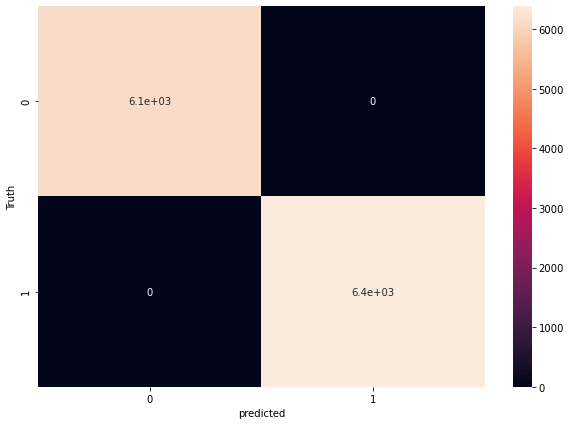

In [59]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [60]:
y_true = y_test
tn, fp, fn, tp = confusion_matrix(y_true, y_predicted).ravel()

accuracy = (tp + tn) / (tp + fp + tn + fn)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [61]:
print(metrics.classification_report(y_true, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6131
           1       1.00      1.00      1.00      6381

    accuracy                           1.00     12512
   macro avg       1.00      1.00      1.00     12512
weighted avg       1.00      1.00      1.00     12512



Can precision and recall both be 1?
Image result for what happens when precision, recall and f1 score all gives 1
In information retrieval, a perfect precision score of 1.0 means that every result retrieved by a search was relevant (but says nothing about whether all relevant documents were retrieved) whereas a perfect recall score of 1.0 means that all relevant documents were retrieved by the search (but says nothing about how ..

### connect prediction with output

In [62]:

# define input
new_input = [[4000.0,
 12050.0,
 1.0,
 6.0,
 145.0,
 44.0,
 8637.5,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0]]

In [63]:
# get prediction for new input
new_output = model_r.predict(new_input)
new_output

array([1], dtype=int64)

In [64]:
new_inputs = [[4000.0,
 28920.0,
 1.0,
 4.0,
 144.0,
 48.0,
 19530.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0]]

In [65]:
new_outputs = model_r.predict(new_inputs)
new_outputs

array([1], dtype=int64)

In [82]:
clean_df.to_csv('database_data.csv', index=False)

In [83]:
clean_df

,course,band,Distance,Track_condition,season,race_group,race_type,Race_Money,trainer,jockey,Track_position,age,Weight,gear,Top_speed,Winner,prize_money
3,other,other,3200,other,5,Hurdle,Handicap,12532.000000,other,other,1.0,4,161,t,33.0,1,8983.000000
11,other,4yo+,4000,Soft,5,Hurdle,Handicap,14460.000000,other,other,1.0,4,156,b,83.0,1,10365.000000
19,other,4yo+,3200,Soft,5,Hurdle,Handicap,12050.000000,other,other,1.0,8,150,b,45.0,1,8637.500000
24,other,5yo+,4000,Soft,5,Hurdle,Handicap,12050.000000,other,other,1.0,6,145,t,44.0,1,8637.500000
29,other,5yo+,4600,other,5,Chase,Even,7712.000000,other,other,1.0,9,154,t,103.0,1,5528.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89904,other,4yo+,4800,Good,13,Hurdle,Handicap,3353.522727,other,other,7.0,8,150,t,9.0,0,0.000000
97172,other,5yo+,5000,other,13,Chase,Handicap,13414.090909,other,Richard Johnson,3.0,12,156,b,50.0,0,1517.727273
64646,other,4yo+,4000,Good,9,Hurdle,Handicap,55948.863636,other,other,4.0,5,148,p,106.0,0,3034.090909
77474,other,4yo+,4800,Good,11,Hurdle,Handicap,2906.386364,other,other,2.0,6,160,b,53.0,0,563.727273


In [84]:
clean_df.dtypes

course              object
band                object
Distance             int64
Track_condition     object
season               int64
race_group          object
race_type           object
Race_Money         float64
trainer             object
jockey              object
Track_position     float64
age                  int64
Weight               int64
gear                object
Top_speed          float64
Winner               int64
prize_money        float64
dtype: object